<b>Name: Rohan Patel</b><br>
<b>Registration No.: 12115398</b><br>
<b>Roll No.: 32</b><br>
<b>Subject: CSM354</b><br>

# CNN(CONVOLUTIONAL NEURAL NETWORK)


#### Convolutional Neural Networks (CNNs) are a specialized type of deep learning model designed specifically for image classification tasks. They have several advantages that make them well-suited for tasks like classifying images of dogs and cats:

## THE REASON FOR CHOOSING THIS ALOGRITHIM:
<b>Image Processing Efficiency</b>: CNNs are specifically designed for processing image data efficiently. Given that mine dataset consists of images of cats and dogs, CNNs are well-suited for handling this type of data.

<b>Hierarchical Feature Extraction</b>: CNNs excel at capturing hierarchical features within images. They automatically learn to identify low-level features like edges and textures, gradually building up to more complex patterns and structures. This capability is essential for recognizing distinguishing features of cats and dogs in the images.

<b>Parameter Sharing</b>: With a large dataset containing high-resolution images (100x100 pixels) and three color channels (RGB), CNNs leverage parameter sharing through convolutional layers. This allows them to learn from local regions of the input images while reducing the number of parameters, making the model more efficient and less prone to overfitting.

<b>Translation Invariance</b>: CNNs are inherently translation invariant, meaning they can identify patterns regardless of their position in the image. This property is crucial for detecting cats and dogs in various poses or orientations within the images.

## About the Dataset:
### X reshaped training set (2000, 100, 100, 3):

2000: This indicates that you have 2000 samples in your training set.
100, 100, 3: Each sample is an image with a shape of 100x100 pixels and 3 color channels (RGB). This means that your images are square-shaped (100x100) and are in color format (3 channels).
### y reshaped training set (2000, 1):

2000: This matches the number of samples in your training set, indicating that you have corresponding labels for each image.
1: Each label is represented as a single number, likely indicating whether the image contains a dog (e.g., 0) or a cat (e.g., 1).
### X reshaped testing set (400, 100, 100, 3):

400: This indicates that you have 400 samples in your testing set.
100, 100, 3: Similar to the training set, each sample is an image with a shape of 100x100 pixels and 3 color channels (RGB).
### y reshaped testing set (400, 1):

400: This matches the number of samples in your testing set, indicating that you have corresponding labels for each test image.
1: Similar to the training set, each label is represented as a single number, indicating whether the image contains a dog or a cat.

In [1]:
import pandas as pd
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
#the fully connected layer are considerd as dense layer in keras
#which will flatten our multidimensional vector into single dimensional verctor

C:\Users\rashi\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# X= pd.read_csv("input.csv")
X_train=np.loadtxt('input.csv',delimiter=',')
y_train=np.loadtxt("labels.csv",delimiter=",")
X_test=np.loadtxt("input_test.csv",delimiter=",")
y_test= np.loadtxt("labels_test.csv",delimiter=",")


In [3]:
print("X training set",X_train.shape) 
print("y training set",y_train.shape)
print("X testing set",X_test.shape)
print("y testing set",y_test.shape)

X training set (2000, 30000)
y training set (2000,)
X testing set (400, 30000)
y testing set (400,)


### About the shape of x_train
Imagine x_train as a giant table with rows and columns. This table holds information about all the images used to train your machine learning model.
Rows: There are 2000 rows, representing 2000 individual images in your training set.
Columns: Each image is described by 30,000 features, which is the information extracted from the image

<b>Image dimensions</b> expressed in pixels. It describes the image size as a square with:
Width: 100 pixels
Height: 100 pixels
### The features we where talking about 
#### Pixel Values
Pixels: These features could be the raw pixel values themselves.
For grayscale images, each pixel might have 1 value (intensity from black to white).
For color images (like RGB), each pixel might have 3 values (intensity for red, green, and blue channels). In your case, with 30,000 features and assuming the images are color, this suggests 30,000/3 = 10,000 pixels per image (likely 100x100 image size).
### Raw Pixels 
If the images are grayscale, each pixel might have 1 feature (intensity).
If they're color (RGB), each pixel might have 3 features (red, green, blue).
In this case, with 30,000 features, assuming RGB images, it could represent 100x100 pixel images (30,000 / 3 = 10,000 pixels). These raw values can be directly used by some models.
#### Flattened Image Arrays
When you have a 2D image (like a grayscale image), it’s common to “flatten” it into a 1D array for use in machine learning models. For example, a 100x100 pixel grayscale image would be flattened into a 1D array with 10,000 features. For a color image, if you have a 100x100 pixel image, and you consider all three RGB channels, you would have 100x100x3 = 30,000 features.
#### Preprocessed Features
Sometimes, raw pixel values are not used directly. Images can be preprocessed to extract more meaningful features. This can include:
#### Edges and Shapes:
Using techniques like edge detection to identify boundaries.
Textures: Analyzing the surface pattern or feel of an object within an image.
Key Points: Identifying specific points of interest within an image.
Histogram of Oriented Gradients (HOG): Describing the orientation of gradients in localized portions of an image.
Feature Engineering
In some cases, domain knowledge can be used to create custom features that are more relevant to the task at hand. For instance, if you’re working with images of faces, you might create features that specifically represent the distance between eyes or the shape of the mouth.
#### Deep Learning Features
With deep learning, particularly Convolutional Neural Networks (CNNs), the model learns to identify the most useful features for the task during the training process. These features can be complex patterns that are not easily interpretable by humans.

In [4]:
#Reshaping the dataset
X_train=X_train.reshape(len(X_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

-  <b>CNNs are designed to process image data, which typically has a 3D shape: (height, width, channels)<b>
-  <b>The X_train and X_test datasets represent images, where each image has dimensions (100, 100, 3) (height, width, channels).<b>
-  <b>The channels dimension corresponds to the color channels (e.g., RGB channels), which is why it’s 3 in this case.<b>

In [5]:
print("X reshaped training set",X_train.shape) 
print("y reshaped training set",y_train.shape)
print("X reshaped testing set",X_test.shape)
print("y reshaped testing set",y_test.shape)

X reshaped training set (2000, 100, 100, 3)
y reshaped training set (2000, 1)
X reshaped testing set (400, 100, 100, 3)
y reshaped testing set (400, 1)


In [6]:
X_train[1,:]
# so whenever we see an single image values the values limit from 0 to 255 which is an typical RGB values 
#so to properly evaluate this we have to rescale these values from 0 to 1

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

-  Normalizing the data such that each RGB values which has range from 0 to 255 could be re arranged from 0 to 1

In [7]:
X_train=X_train/255.0 # now its normalized
X_test=X_test/255.0

In [8]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

-  txt is a random index (integer) that you generated using random.randint(0, len(X_train)).

-    The colon : indicates that we want to select all elements along the second dimension (i.e., all features or pixels).

<b>In summary X_train[txt, :] retrieves the feature vector (pixel values) for a specific image in your training data. The : indicates that we’re selecting all features (pixels) for that particular image.<b>

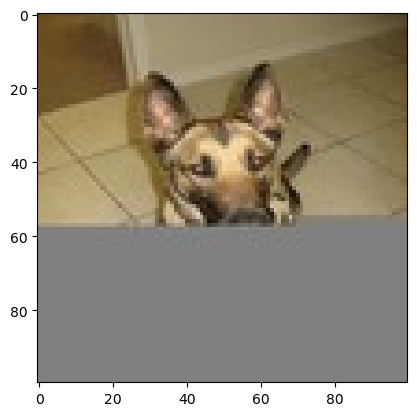

In [9]:
#to import our image we have to use matplot lib library 
import matplotlib.pyplot as plt
import random 
txt = random.randint(0,len(X_train))# to shwo plots we use plt.show() as for viewing an image we use imshow()
plt.imshow(X_train[txt,:])

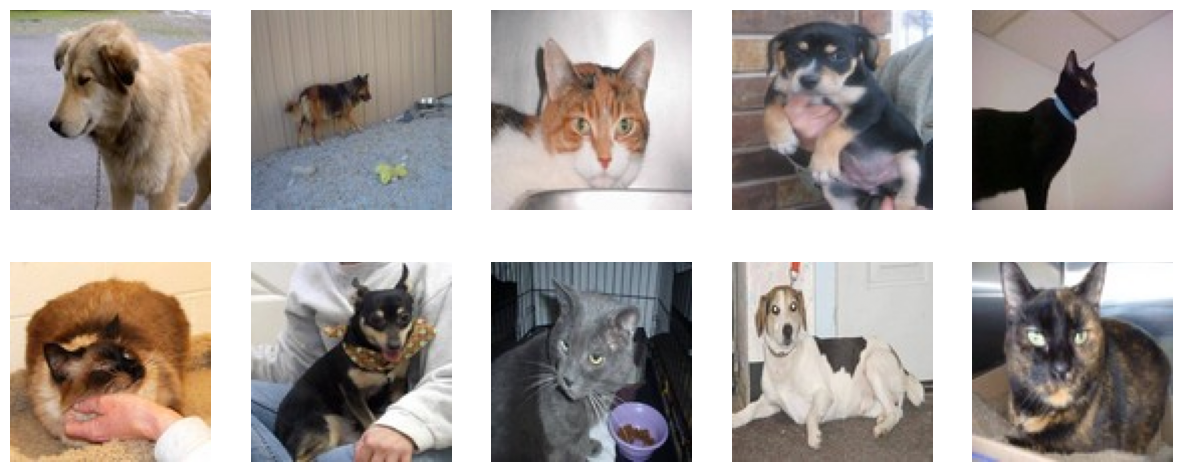

In [18]:
import matplotlib.pyplot as plt
import random 

indices = random.sample(range(len(X_train)), 10)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, idx in enumerate(indices):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(X_train[idx, :])
    axes[row, col].axis('off')  # Turn off axis labels

plt.show()


## Training of Model

## 1 Convolutional Layers (Conv2D):

Function: Extract features from the input image. These features could be edges, shapes, colors, or more complex patterns.
Mechanism: Uses filters (kernels) that slide across the image, performing element-wise multiplication with the input data. The resulting values are summed to create a feature map.
Hyperparameters:
Number of filters: Controls how many features the layer detects. More filters generally lead to capturing a wider range of features, but also increase model complexity.
Kernel size: Defines the size of the filter (e.g., 3x3, 5x5). Smaller kernels focus on capturing local features, while larger kernels can capture more global features.
Stride: Determines the movement of the filter across the image. A stride of 1 moves the filter one pixel at a time, while a stride of 2 moves it two pixels at a time, resulting in a smaller output size.
Padding: Controls how to handle the edges of the image. Padding with zeros can prevent the output size from shrinking as the filter slides across the image.

### Imagine you're a detective investigating a crime scene photo:

The photo (input image): This is the data you feed into the CNN. It contains a lot of details, like a blurry face, a dropped weapon, and a broken window.
Convolutional layers (detectives with magnifying glasses): These layers are like detectives who use magnifying glasses to identify key features in the photo. They focus on specific areas and extract important details.
Pooling layers (detectives summarizing observations): After identifying features, these detectives need to report their findings to the captain (fully connected layers). Pooling layers act like these detectives who summarize their observations. They don't need to transmit every single detail, just the most important ones.
Here's how pooling layers work:

## 2 Pooling layers
### Divide the image into grids: 
They split the feature maps from the convolutional layers into smaller squares (often 2x2 or 3x3).
Summarize each grid: There are two main ways to do this:
Max pooling: They pick the most significant detail from each grid. This is like the detective reporting only the most crucial information they saw (e.g., "weapon on the floor").
Average pooling: They calculate the average detail within each grid. This is similar to the detective reporting a general impression of what they saw (e.g., "something blurry in the corner").
Benefits of using pooling layers:

### Reduce data size:
They shrink the number of data points by summarizing information, making the model more efficient and reducing computational cost. This is like the detectives not sending the entire photo but just a concise summary.
Improve generalization: Pooling helps the model focus on the essence of features rather than tiny details, which can vary between images. This makes the model more robust to slight variations in the input (e.g., recognizing a face even if it's slightly tilted).
## 3. Activation Layers (ReLU, Leaky ReLU):

Function: Introduce non-linearity into the network. This is crucial because linear models cannot learn complex relationships between features.
Mechanism: Apply a non-linear activation function to the outputs of the previous layers. Popular choices include:
ReLU (Rectified Linear Unit): Sets negative values to zero and keeps positive values unchanged. It's computationally efficient and often a good default choice.
Leaky ReLU: Similar to ReLU, but allows a small positive slope for negative values. This can help prevent the "dying ReLU" problem where some neurons become inactive during training.
Hyperparameter: Choice of activation function, depending on the task and dataset.
## 4. Flatten Layer:

Function: Converts the multidimensional output from the convolutional layers (typically feature maps) into a 1D vector. This allows feeding the extracted features into fully connected layers.
## 5. Fully Connected Layers (Dense):

Function: Perform classification or regression tasks. These layers operate similarly to those in traditional neural networks, taking the flattened output from the previous layer and processing it through multiple layers of neurons.
Hyperparameters:
Number of neurons per layer: Controls the model's capacity to learn complex relationships between extracted features. More neurons generally lead to higher model complexity.
Activation function: Similar to convolutional layers, the choice of activation function (e.g., ReLU, softmax) depends on the task.
Experimentation and Optimization:

The optimal configuration for a CNN architecture depends on the specific dataset and task. Experimentation with different hyperparameters is often necessary to find the best balance between feature extraction, model complexity, and performance. Techniques like validation sets and hyperparameter tuning can help you refine your model.

By understanding these layers and their associated hyperparameters, you can effectively build CNN architectures for various image recognition, image classification, and other computer vision tasks.

In [10]:
 model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
   Dense(64,activation="relu"),
   Dense(1,activation="sigmoid")
          ])

C:\Users\rashi\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Loss:
-  The loss function measures how well the model is performing by comparing its predictions to the actual target values "binary_crossentropy" is used, which is a common choice for binary classification problems where the output is either 0 or 1. It computes the cross-entropy loss between the true labels and the predicted probabilities.

### Adam as an optimizer:
-  This specifies the learning rate of the model where adam  is a  popular choice due to its adaptive learning rate and momentum. It is well-suited for a wide range of optimization problems and often converges quickly.

### Metrices:
-  Metrics are used to monitor the performance of the model.<b>"accuracy"</b> is provided, indicating that the accuracy of the model will be calculated and reported during training and evaluation.

In [11]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
help(model.compile)

Help on method compile in module keras.src.trainers.trainer:

compile(optimizer='rmsprop', loss=None, loss_weights=None, metrics=None, weighted_metrics=None, run_eagerly=False, steps_per_execution=1, jit_compile='auto', auto_scale_loss=True) method of keras.src.models.sequential.Sequential instance
    Configures the model for training.
    
    Example:
    
    ```python
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[
            keras.metrics.BinaryAccuracy(),
            keras.metrics.FalseNegatives(),
        ],
    )
    ```
    
    Args:
        optimizer: String (name of optimizer) or optimizer instance. See
            `keras.optimizers`.
        loss: Loss function. May be a string (name of loss function), or
            a `keras.losses.Loss` instance. See `keras.losses`. A
            loss function is any callable with the signature
            `loss = fn(y_true, y_pred)`, wher

In [13]:
model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.5036 - loss: 0.8760
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.5701 - loss: 0.6859
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - accuracy: 0.6357 - loss: 0.6320
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.6719 - loss: 0.6123
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - accuracy: 0.7503 - loss: 0.5411
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 0.7824 - loss: 0.4637
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.7812 - loss: 0.4322
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.8456 - loss: 0.3540
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.8940 - loss: 0.2619
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.9134 - loss: 0.2251


-  The model accuracy of 0.6103 implies that it accurately classified around 61.03% of the samples in the dataset.

-  As for the loss value of 0.8281, it serves as an indicator of the model's performance. It quantifies the disparity between the predicted values and the actual values in the dataset. Here, a loss of 0.8281 suggests that, on average, the model's predictions deviate from the true values by approximately 0.8281 units.

In [14]:
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6103 - loss: 0.8281


[0.7955878376960754, 0.637499988079071]

## Making predicitons

-  <b>Binary classification</b> involves distinguishing between two classes, in this case, dogs and cats.
-  <b>y_pred = model.predict(X_test[idx, :].reshape(1, 100, 100, 3))</b>: The model predicts the class label for the selected image. The input image is reshaped to match the input shape expected by the model.
-  <b>y_pred = y_pred > 0.5</b>: This line converts the model's output probabilities into binary predictions. If the predicted probability is greater than 0.5, it assigns the label 1 (cat); otherwise, it assigns the label 0 (dog).

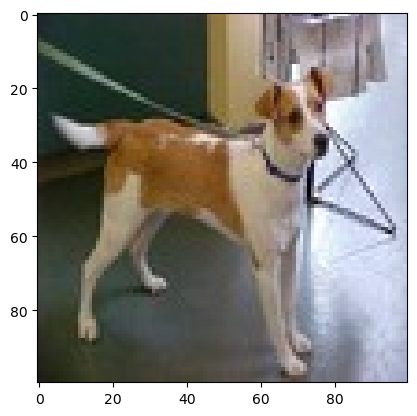

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
It's an Dog


In [15]:
idx=random.randint(0,len(y_test))
plt.imshow(X_test[idx,:])
plt.show()
y_pred=model.predict(X_test[idx,:].reshape(1,100,100,3))
y_pred=y_pred>0.5
if(y_pred==0):
    print("It's an Dog")
else:
    print("It's an CAT")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


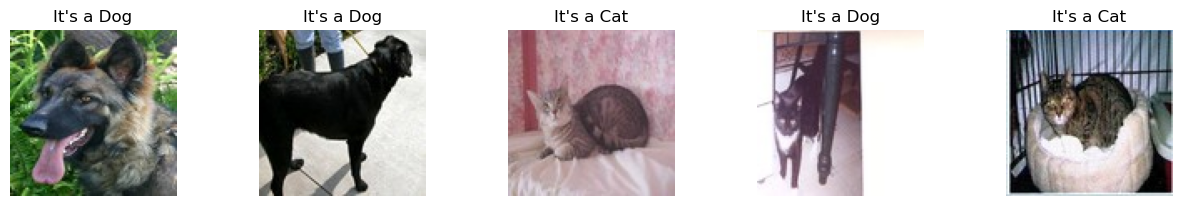

In [27]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    idx = random.randint(0, len(y_test) - 1)
    axes[i].imshow(X_test[idx, :])
    axes[i].axis('off')  # This turns of the axis labels
    plt.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing between subplots

    y_pred = model.predict(X_test[idx, :].reshape(1, 100, 100, 3))

    if y_pred[0] <= 0.5:
        axes[i].set_title("It's a Dog")
    else:
        axes[i].set_title("It's a Cat")

plt.show()